**Titanic Dataset Project**

**Install the required libraries**

In [ ]:
pip install pandas seaborn matplotlib


 2. Import Necessary Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


3. Load and Explore the Dataset

In [6]:
# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
# Display the first few rows of the dataset
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


4. Data Cleaning 

In [8]:

# Check for missing values
print(titanic_df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [24]:
# Fill missing values for 'age' with the median value
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

C:\Users\MG C\AppData\Local\Temp\ipykernel_7812\1518349152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)


In [10]:
# Drop rows with missing 'embarked' values
titanic_df.dropna(subset=['embarked'], inplace=True)

In [13]:

# For simplicity, drop 'deck' column as it has many missing values
titanic_df.drop(columns=['deck'], inplace=True)

In [15]:
# Check again for missing values
print(titanic_df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


5. Visualize the Data

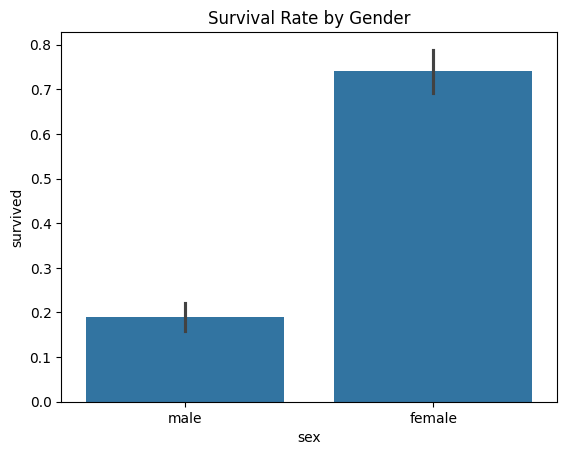

In [17]:
# Survival rate by gender
sns.barplot(x='sex', y='survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

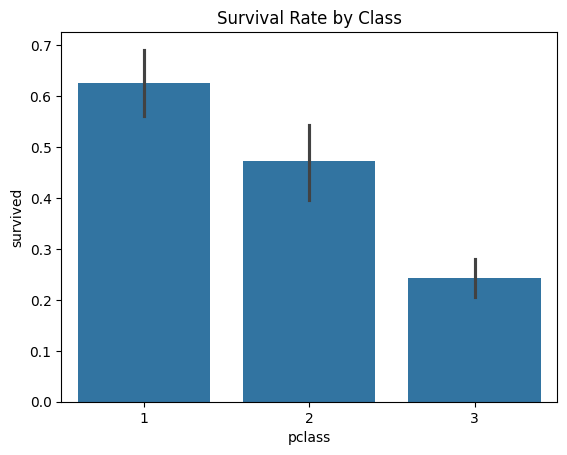

In [18]:
# Survival rate by class
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.title('Survival Rate by Class')
plt.show()

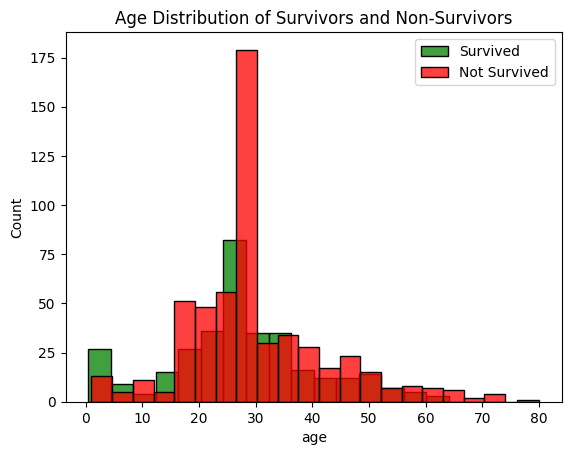

In [20]:
# Age distribution of survivors and non-survivors
sns.histplot(titanic_df[titanic_df['survived'] == 1]['age'], kde=False, color='green', label='Survived', bins=20)
sns.histplot(titanic_df[titanic_df['survived'] == 0]['age'], kde=False, color='red', label='Not Survived', bins=20)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.show()

6. Rule-Based Prediction

In [21]:
def predict_survival(row):
    # Women are more likely to survive
    if row['sex'] == 'female':
        return 1
    # Children are more likely to survive
    elif row['age'] < 16:
        return 1
    # Higher-class passengers are more likely to survive
    elif row['pclass'] == 1:
        return 1
    else:
        return 0

# Apply the rule-based prediction
titanic_df['predicted_survival'] = titanic_df.apply(predict_survival, axis=1)


accuracy of the predictions


In [22]:
accuracy = (titanic_df['survived'] == titanic_df['predicted_survival']).mean() * 100
print(f"Accuracy of Rule-Based Prediction: {accuracy:.2f}%")





Accuracy of Rule-Based Prediction: 74.92%


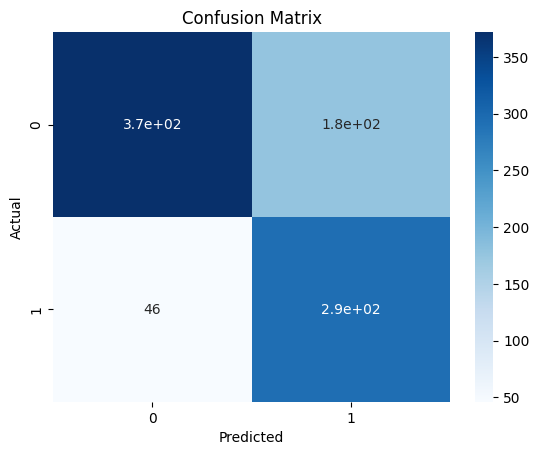

In [23]:
# Confusion matrix
confusion_matrix = pd.crosstab(titanic_df['survived'], titanic_df['predicted_survival'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()